This notebook uses episodic training with raw mutation and CNV data as input data.

This uses AUROC when validating model during training and saving best model. TCGA is seen by model when training. There are 2 domain-specific modules, for cell-line and TCGA.

#### Imports

In [1]:
import pandas as pd
import numpy as np

In [2]:
import sys

sys.path.append("../../vae_zinb_reprn/")
sys.path.append("../src/")

In [3]:
import datetime
import logging
import time
import torch
import random

In [4]:
from EpiFCRModel import ModelEpiFCR

In [5]:
chosen_seed = 42
torch.manual_seed(chosen_seed)
random.seed(chosen_seed)
np.random.seed(chosen_seed)

In [6]:
torch.multiprocessing.set_sharing_strategy('file_system')

### PACLITAXEL

In [7]:
best_parameters = {'audrc_threshold': 0.3106040036678314,
 'ldr': 0.1309723129030317,
 'lr': 0.47788325981236995,
 'weight_decay': 0.04529999710619449,
 'momentum': 0.785103360004723,
 'step_size': 61,
 'loss_weight_epic': 5.104672106914222,
 'loss_weight_epif': 5.474020070396364,
 'loss_weight_epir': 1.7873578583821654,
 'loops_agg_warm': 60,
 'loops_train': 600,
 'loops_warm': 80,
 'warm_up_agg': 0,
 'ite_train_epi_c': 70,
 'ite_train_epi_f': 70,               
 'hd': 3,
 'batch_size': 32,
 'test_every': 1,
 'bn_eval': 0,
 'seed': 42}

In [8]:
model_PACLITAXEL = ModelEpiFCR('PACLITAXEL', 'mut_cnv')
#  Unable to calculate AUROC for validation set 1
model_PACLITAXEL.get_results(best_parameters)

DomainSpecificNN(
  (feature1): FeatModule(
    (features): Sequential(
      (0): Linear(in_features=648, out_features=128, bias=True)
      (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Dropout(p=0.1309723129030317, inplace=False)
      (4): Linear(in_features=128, out_features=128, bias=True)
      (5): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (6): ReLU()
      (7): Dropout(p=0.1309723129030317, inplace=False)
      (8): Linear(in_features=128, out_features=128, bias=True)
      (9): Sigmoid()
    )
  )
  (feature2): FeatModule(
    (features): Sequential(
      (0): Linear(in_features=648, out_features=128, bias=True)
      (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Dropout(p=0.1309723129030317, inplace=False)
      (4): Linear(in_features=128, out_features=128, bias=True)
      (5): BatchNorm1d(12

/home/nicole/anaconda3/envs/druid/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:877: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/home/nicole/anaconda3/envs/druid/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:877: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


,dataset,length_dataset,value_counts,roc_auc,aupr
0,cell-line,68,{0: 68},NaN,-0.000000
0,PDX,8,{0: 8},NaN,-0.000000
0,TCGA,31,"{1: 23, 0: 8}",0.733696,0.913105


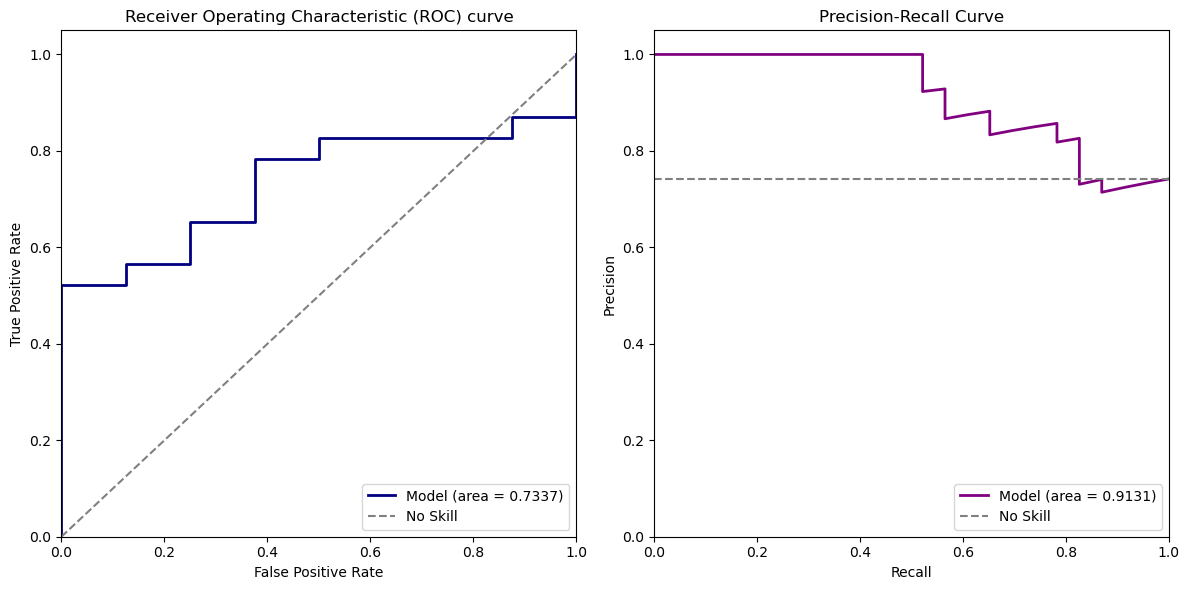

In [9]:
model_PACLITAXEL.get_roc_pr_curves(best_parameters, False, 'tcga')

In [10]:
model_PACLITAXEL.get_train_set_results(best_parameters, False)

Threshold used for cell-line with PACLITAXEL: 0.3106040036678314


,dataset,length_dataset,value_counts,roc_auc,aupr
0,cell-line,608,"{0: 603, 1: 5}",0.796683,0.223908
0,PDX,35,"{0: 30, 1: 5}",0.206667,0.105378
0,TCGA,82,"{1: 53, 0: 29}",0.743006,0.837308


Distribution of Predictions by Model
[0.24669915 0.24738861 0.2474727  0.2476415  0.24830262]
TP: 0, FP: 0, TN: 8, FN: 23


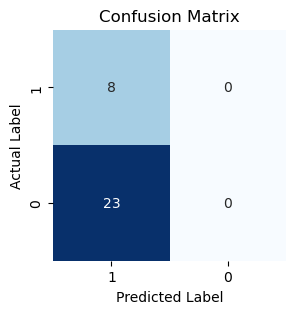

In [11]:
model_PACLITAXEL.plot_confusion_matrix(best_parameters, False, 'tcga', 0.5)

### CISPLATIN

In [12]:
best_parameters = {'audrc_threshold': 0.30322444522902836,
 'ldr': 0.48409770646343186,
 'lr': 0.40959542810914085,
 'weight_decay': 0.07983895401145846,
 'momentum': 0.24467485400654812,
 'step_size': 37,
 'loss_weight_epic': 4.470104797757912,
 'loss_weight_epif': 3.020523506848372,
 'loss_weight_epir': 4.00227993030986,
 'loops_agg_warm': 80,
 'loops_train': 250,
 'loops_warm': 80,
 'warm_up_agg': 0,
 'ite_train_epi_c': 100,
 'ite_train_epi_f': 60,
 'hd': 2,
 'batch_size': 64,
 'test_every': 1,
 'bn_eval': 0,
 'seed': 42}

In [13]:
model_CISPLATIN = ModelEpiFCR('CISPLATIN', 'mut_cnv')
model_CISPLATIN.get_results(best_parameters)

DomainSpecificNN(
  (feature1): FeatModule(
    (features): Sequential(
      (0): Linear(in_features=648, out_features=256, bias=True)
      (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Dropout(p=0.48409770646343186, inplace=False)
      (4): Linear(in_features=256, out_features=256, bias=True)
      (5): Sigmoid()
    )
  )
  (feature2): FeatModule(
    (features): Sequential(
      (0): Linear(in_features=648, out_features=256, bias=True)
      (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Dropout(p=0.48409770646343186, inplace=False)
      (4): Linear(in_features=256, out_features=256, bias=True)
      (5): Sigmoid()
    )
  )
  (classifier1): ClassifierModule(
    (pred): Sequential(
      (0): Linear(in_features=256, out_features=1, bias=True)
    )
  )
  (classifier2): ClassifierModule(
    (pred): Sequential(
      (0): Linear(in_features=25

,dataset,length_dataset,value_counts,roc_auc,aupr
0,cell-line,54,"{0: 53, 1: 1}",0.924528,0.200000
0,TCGA,36,"{1: 27, 0: 9}",0.720165,0.877316


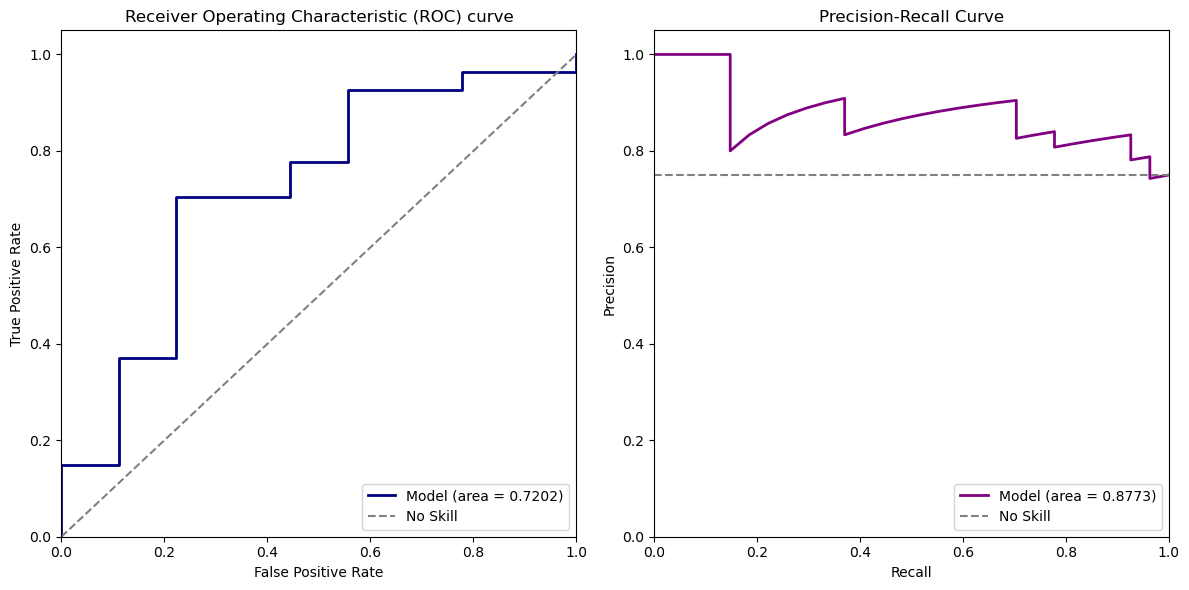

In [14]:
model_CISPLATIN.get_roc_pr_curves(best_parameters, False, 'tcga')

In [15]:
model_CISPLATIN.get_train_set_results(best_parameters, False)

Threshold used for cell-line with CISPLATIN: 0.30322444522902836
Test set Idx 1 has only response []


,dataset,length_dataset,value_counts,roc_auc,aupr
0,cell-line,483,"{0: 478, 1: 5}",0.808368,0.038772
0,PDX,0,{},NaN,NaN
0,TCGA,170,"{1: 130, 0: 40}",0.462500,0.713303


Distribution of Predictions by Model
[0.72225177 0.72393262 0.72520643 0.72712395 0.73349088]
TP: 27, FP: 9, TN: 0, FN: 0


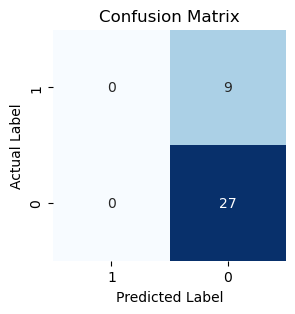

In [16]:
model_CISPLATIN.plot_confusion_matrix(best_parameters, False, 'tcga', 0.5)

## 5-FLUOROURACIL

In [17]:
best_parameters = {'audrc_threshold': 0.3123944720812142,
 'ldr': 0.4728893555700779,
 'lr': 0.3404225937183946,
 'weight_decay': 0.02482901807874441,
 'momentum': 0.5295396303758025,
 'step_size': 90,
 'loss_weight_epic': 0.800988812930882,
 'loss_weight_epif': 1.443027202039957,
 'loss_weight_epir': 4.539985705167055,
 'loops_train': 400,
 'hd': 2,
 'batch_size': 32,
 'loops_agg_warm': 70,
 'loops_warm': 90,
 'warm_up_agg': 0,
 'test_every': 1,
 'ite_train_epi_c': 70,
 'ite_train_epi_f': 0,
 'bn_eval': 0,
 'seed': 42}

In [18]:
model_5_FLUOROURACIL = ModelEpiFCR('5-FLUOROURACIL', 'mut_cnv')
#  Unable to calculate AUROC for validation set 1
model_5_FLUOROURACIL.get_results(best_parameters)

DomainSpecificNN(
  (feature1): FeatModule(
    (features): Sequential(
      (0): Linear(in_features=648, out_features=256, bias=True)
      (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Dropout(p=0.4728893555700779, inplace=False)
      (4): Linear(in_features=256, out_features=256, bias=True)
      (5): Sigmoid()
    )
  )
  (feature2): FeatModule(
    (features): Sequential(
      (0): Linear(in_features=648, out_features=256, bias=True)
      (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Dropout(p=0.4728893555700779, inplace=False)
      (4): Linear(in_features=256, out_features=256, bias=True)
      (5): Sigmoid()
    )
  )
  (classifier1): ClassifierModule(
    (pred): Sequential(
      (0): Linear(in_features=256, out_features=1, bias=True)
    )
  )
  (classifier2): ClassifierModule(
    (pred): Sequential(
      (0): Linear(in_features=256,

/home/nicole/anaconda3/envs/druid/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:877: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


,dataset,length_dataset,value_counts,roc_auc,aupr
0,cell-line,61,{0: 61},NaN,-0.000000
0,TCGA,21,"{1: 17, 0: 4}",0.897059,0.975472


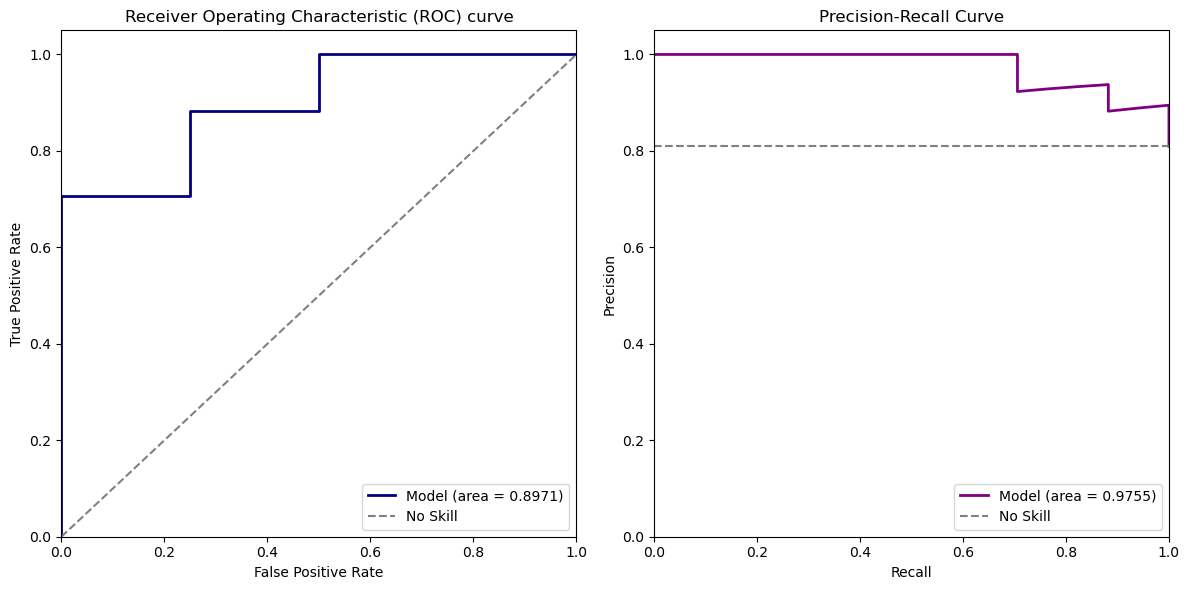

In [19]:
model_5_FLUOROURACIL.get_roc_pr_curves(best_parameters, False, 'tcga')

In [20]:
model_5_FLUOROURACIL.get_train_set_results(best_parameters, False)

Threshold used for cell-line with 5-FLUOROURACIL: 0.3123944720812142
Test set Idx 0 has only response [0]
Test set Idx 1 has only response []


,dataset,length_dataset,value_counts,roc_auc,aupr
0,cell-line,528,{0: 528},NaN,NaN
0,PDX,0,{},NaN,NaN
0,TCGA,104,"{1: 65, 0: 39}",0.604734,0.719467


Distribution of Predictions by Model
[0.78537494 0.82036293 0.83743608 0.88753396 0.92380512]
TP: 17, FP: 4, TN: 0, FN: 0


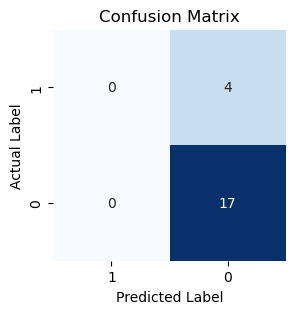

In [21]:
model_5_FLUOROURACIL.plot_confusion_matrix(best_parameters, False, 'tcga', 0.5)

## CYCLOPHOSPHAMIDE

In [22]:
best_parameters = {'audrc_threshold': 0.4995026707649231,
 'ldr': 0.16565495878458023,
 'lr': 0.46459577083587644,
 'weight_decay': 0.05516592979431152,
 'momentum': 0.7113288402557373,
 'step_size': 43,
 'loss_weight_epic': 3.187045991420746,
 'loss_weight_epif': 5.244421184062958,
 'loss_weight_epir': 1.547518938779831,
 'loops_agg_warm': 90,
 'loops_train': 400,
 'loops_warm': 60,
 'warm_up_agg': 0,
 'ite_train_epi_c': 150,
 'ite_train_epi_f': 90,
 'hd': 4,
 'batch_size': 64,
 'test_every': 1,
 'bn_eval': 0,
 'seed': 42}

In [23]:
model_CYCLOPHOSPHAMIDE = ModelEpiFCR('CYCLOPHOSPHAMIDE', 'mut_cnv')
#  Unable to calculate AUROC for validation set 1
model_CYCLOPHOSPHAMIDE.get_results(best_parameters)

DomainSpecificNN(
  (feature1): FeatModule(
    (features): Sequential(
      (0): Linear(in_features=648, out_features=64, bias=True)
      (1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Dropout(p=0.16565495878458023, inplace=False)
      (4): Linear(in_features=64, out_features=64, bias=True)
      (5): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (6): ReLU()
      (7): Dropout(p=0.16565495878458023, inplace=False)
      (8): Linear(in_features=64, out_features=64, bias=True)
      (9): Sigmoid()
    )
  )
  (feature2): FeatModule(
    (features): Sequential(
      (0): Linear(in_features=648, out_features=64, bias=True)
      (1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Dropout(p=0.16565495878458023, inplace=False)
      (4): Linear(in_features=64, out_features=64, bias=True)
      (5): BatchNorm1d(64, eps=1e

,dataset,length_dataset,value_counts,roc_auc,aupr
0,cell-line,66,"{0: 64, 1: 2}",0.695312,0.081250
0,TCGA,19,"{1: 17, 0: 2}",0.705882,0.957891


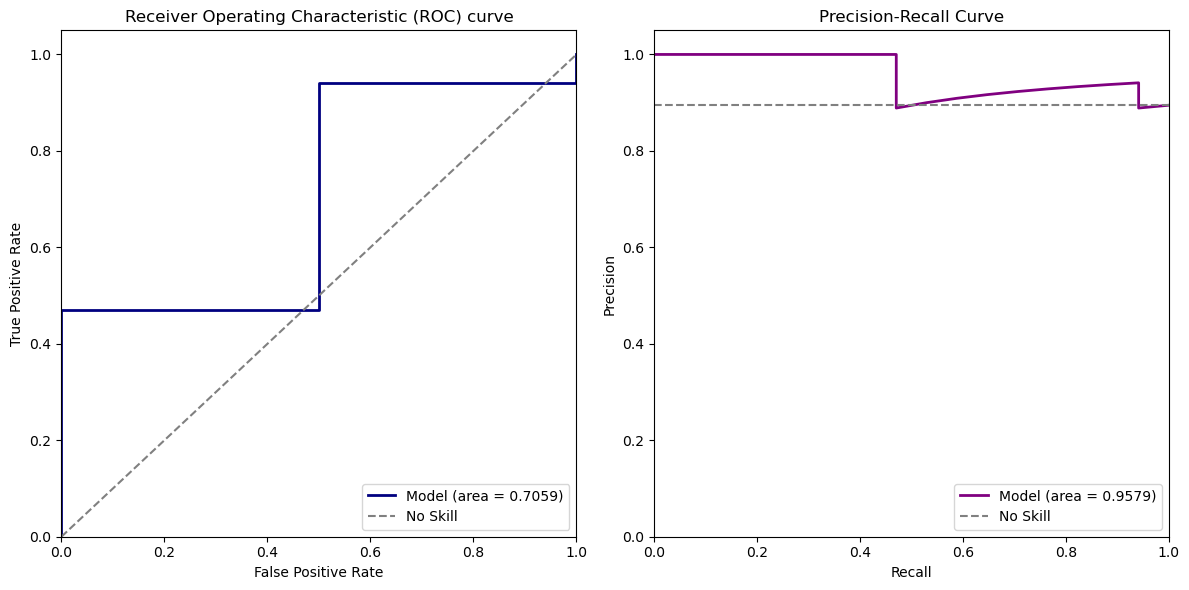

In [24]:
model_CYCLOPHOSPHAMIDE.get_roc_pr_curves(best_parameters, False, 'tcga')

In [25]:
model_CYCLOPHOSPHAMIDE.get_train_set_results(best_parameters, False)

Threshold used for cell-line with CYCLOPHOSPHAMIDE: 0.4995026707649231
Test set Idx 1 has only response []


,dataset,length_dataset,value_counts,roc_auc,aupr
0,cell-line,579,"{0: 561, 1: 18}",0.752129,0.197674
0,PDX,0,{},NaN,NaN
0,TCGA,50,"{1: 47, 0: 3}",0.985816,0.999104


Distribution of Predictions by Model
[0.50065303 0.53967565 0.60410535 0.68625462 0.72341031]
TP: 17, FP: 2, TN: 0, FN: 0


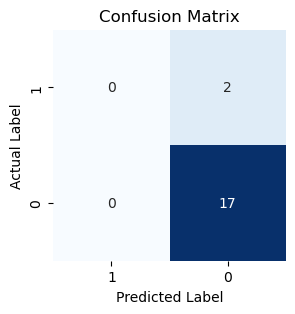

In [26]:
model_CYCLOPHOSPHAMIDE.plot_confusion_matrix(best_parameters, False, 'tcga', 0.5)

## GEMCITABINE

In [27]:
best_parameters = {'audrc_threshold': 0.3782963426783681,
 'ldr': 0.22795156491920354,
 'lr': 0.23944247830659154,
 'weight_decay': 0.03099397719837725,
 'momentum': 0.023089525848627092,
 'step_size': 62,
 'loss_weight_epic': 6.3769961362704635,
 'loss_weight_epif': 0.6386568173766136,
 'loss_weight_epir': 2.432774911634624,
 'loops_agg_warm': 50,
 'loops_train': 400,
 'loops_warm': 50,
 'warm_up_agg': 0,
 'ite_train_epi_c': 50,
 'ite_train_epi_f': 60,
 'hd': 2,
 'batch_size': 32,
 'test_every': 1,
 'bn_eval': 0,
 'seed': 42}

In [28]:
model_GEMCITABINE = ModelEpiFCR('GEMCITABINE', 'mut_cnv')
#  Unable to calculate AUROC for validation set 1
model_GEMCITABINE.get_results(best_parameters)

DomainSpecificNN(
  (feature1): FeatModule(
    (features): Sequential(
      (0): Linear(in_features=648, out_features=256, bias=True)
      (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Dropout(p=0.22795156491920354, inplace=False)
      (4): Linear(in_features=256, out_features=256, bias=True)
      (5): Sigmoid()
    )
  )
  (feature2): FeatModule(
    (features): Sequential(
      (0): Linear(in_features=648, out_features=256, bias=True)
      (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Dropout(p=0.22795156491920354, inplace=False)
      (4): Linear(in_features=256, out_features=256, bias=True)
      (5): Sigmoid()
    )
  )
  (classifier1): ClassifierModule(
    (pred): Sequential(
      (0): Linear(in_features=256, out_features=1, bias=True)
    )
  )
  (classifier2): ClassifierModule(
    (pred): Sequential(
      (0): Linear(in_features=25

/home/nicole/anaconda3/envs/druid/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:877: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


,dataset,length_dataset,value_counts,roc_auc,aupr
0,cell-line,54,{0: 54},NaN,-0.000000
0,TCGA,18,"{0: 9, 1: 9}",0.62963,0.711923


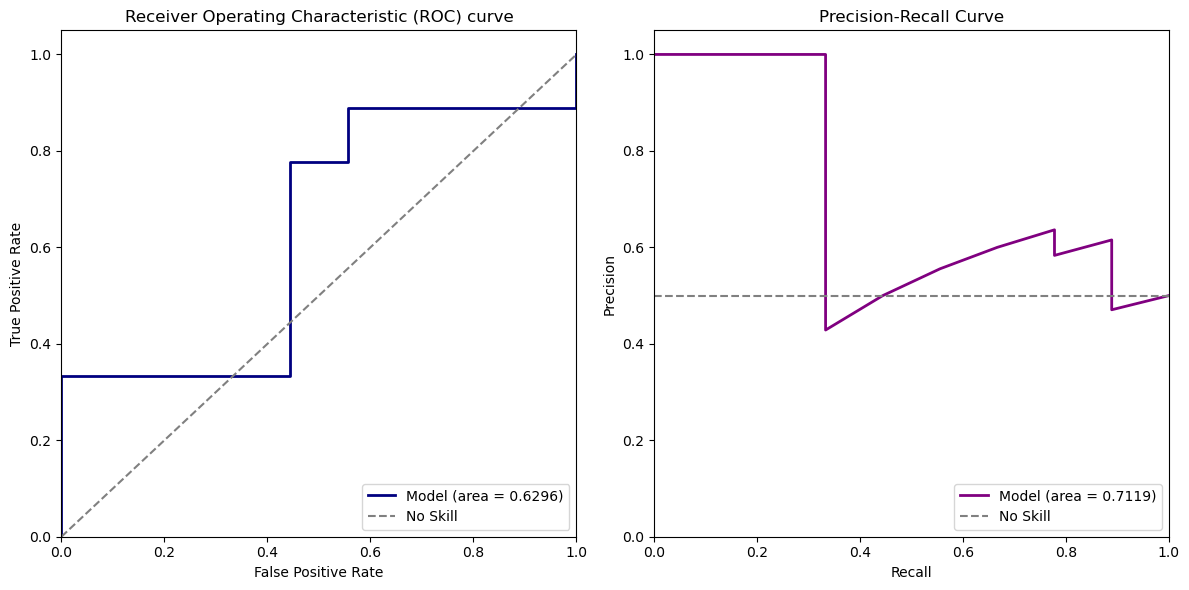

In [29]:
model_GEMCITABINE.get_roc_pr_curves(best_parameters, False, 'tcga')

In [30]:
model_GEMCITABINE.get_train_set_results(best_parameters, False)

Threshold used for cell-line with GEMCITABINE: 0.3782963426783681
Test set Idx 0 has only response [0]
Test set Idx 1 has only response []


,dataset,length_dataset,value_counts,roc_auc,aupr
0,cell-line,483,{0: 483},NaN,NaN
0,PDX,0,{},NaN,NaN
0,TCGA,44,"{1: 27, 0: 17}",0.749455,0.76186


Distribution of Predictions by Model
[0.7497862  0.81169386 0.85473508 0.89424285 0.99233854]
TP: 9, FP: 9, TN: 0, FN: 0


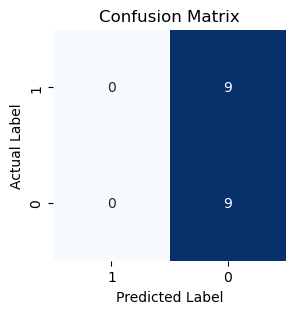

In [31]:
model_GEMCITABINE.plot_confusion_matrix(best_parameters, False, 'tcga', 0.5)